Epoch 1/5
750/750 [==============================] - 35s 45ms/step - loss: 0.5087 - accuracy: 0.8166 - val_loss: 0.3677 - val_accuracy: 0.8668
Epoch 2/5
750/750 [==============================] - 35s 46ms/step - loss: 0.3306 - accuracy: 0.8795 - val_loss: 0.3092 - val_accuracy: 0.8900
Epoch 3/5
750/750 [==============================] - 34s 45ms/step - loss: 0.2836 - accuracy: 0.8959 - val_loss: 0.2827 - val_accuracy: 0.8972
Epoch 4/5
750/750 [==============================] - 32s 43ms/step - loss: 0.2524 - accuracy: 0.9076 - val_loss: 0.2700 - val_accuracy: 0.9007
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 0.2883 - accuracy: 0.8956

Test accuracy: 0.8956
313/313 [==============================] - 3s 9ms/step


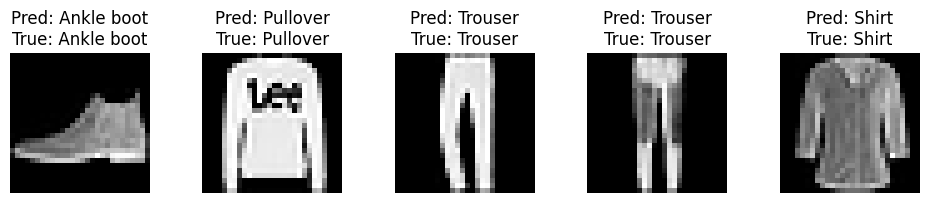

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_acc:.4f}")
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
plt.figure(figsize=(12,4))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {class_names[y_pred_classes[i]]}\nTrue: {class_names[y_true[i]]}")
    plt.axis('off')
plt.show()
